In [29]:
import mysql.connector
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt


user = "infscompany"
password = "yeadata"
host = "128.198.162.191"
#port = 3307 # port may not be required depending on your configuration.
database = "company"

In [30]:
# This formatted string can be found in the 'companyDB-Example.ipynb' file in Github.
# Create a connection to the MySQL database
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

# Choosing a SQL query to reduce the amount of data needed for the dataframe.

# Define the SQL query
sql_query = "SELECT YEAR(SalesDate) AS Year, MONTH(SalesDate) AS Month, SUM(Weekly_Sales) AS TotalSales FROM sales WHERE Dept = '55' GROUP BY YEAR(SalesDate), MONTH(SalesDate);"

sql = text(sql_query)

# Execute the SQL query and store the results in a Pandas DataFrame
sales_df = pd.read_sql_query(sql, engine)

# Remove any NaN values
sales_df = sales_df.dropna()

# Display all the values as INT
sales_df = sales_df.astype(int)

# Show results
sales_df.head(10)

,Year,Month,TotalSales
0,2019,2,3981645
1,2019,3,3312521
2,2019,4,3443900
3,2019,5,2422348
4,2019,6,2597272
5,2019,7,3052202
6,2019,8,2280959
7,2019,9,2276537
8,2019,10,2974144
9,2019,11,5440283


In [31]:
# Define the SQL query
sql_query = "SELECT YEAR(ExpenseDate) as Year, MONTH(ExpenseDate) as Month, SUM(Expense_Allocation) as TotalExpenses FROM expenses_month_dept WHERE Dept = '55' GROUP BY YEAR(ExpenseDate), MONTH(ExpenseDate);"

sql = text(sql_query)

# Execute the SQL query and store the results in a Pandas DataFrame
expenses_df = pd.read_sql_query(sql, engine)

# Remove any NaN values
expenses_df = expenses_df.dropna()

# Display all the values as INT
expenses_df = expenses_df.astype(int)

expenses_df.head()

,Year,Month,TotalExpenses
0,2019,2,16295911
1,2019,3,20811393
2,2019,4,20859050
3,2019,5,20902128
4,2019,6,20013404


## Merge the data frames

In [32]:
# Merging dataframes examples from Session 8 presentation.
merged_df = pd.merge(sales_df, expenses_df, on=['Year', 'Month'])

merged_df.head()

,Year,Month,TotalSales,TotalExpenses
0,2019,2,3981645,16295911
1,2019,3,3312521,20811393
2,2019,4,3443900,20859050
3,2019,5,2422348,20902128
4,2019,6,2597272,20013404


## Subtract Expenses from Sales to get Profit.

In [33]:
# Merge the dataframes and calculate profit.
merged_df['Profit'] = merged_df['TotalSales'] - merged_df['TotalExpenses']

# Round the profit to the nearest $500K
merged_df['Profit'] = round(merged_df['Profit'] / 500000) * 500000 

# Format the results as Currency with zero decimal places
merged_df['Profit'] = merged_df['Profit'].map('${:,.0f}'.format) 

merged_df.head()

,Year,Month,TotalSales,TotalExpenses,Profit
0,2019,2,3981645,16295911,"$-12,500,000"
1,2019,3,3312521,20811393,"$-17,500,000"
2,2019,4,3443900,20859050,"$-17,500,000"
3,2019,5,2422348,20902128,"$-18,500,000"
4,2019,6,2597272,20013404,"$-17,500,000"


## Create a graph to show the profit by Year and Month

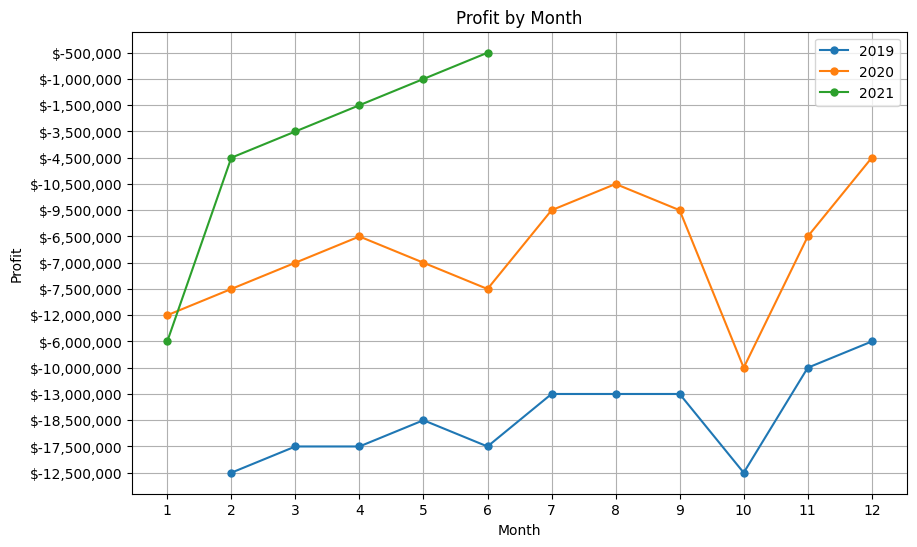

In [34]:
# Examples of plotting from the 'Hurricanes.ipynb' file in Github

# Group merged_df by year
grouped_df = merged_df.groupby('Year')

# Set the figure size
plt.figure(figsize=(10,6))

# Loop through each year and plot a separate line
for year, group in grouped_df:plt.plot(group['Month'], group['Profit'], label=year, marker='.', markersize=10)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Profit by Month')

# Set the tick marks on X-axis
months = merged_df['Month'].unique() # get all the unique months
plt.xticks(months)

# Add a legend
plt.legend()
plt.grid()

# Display the plot
plt.show()

# I can do the same with just dataframes and not as much SQL.

## Extract the Sales data for the Media and Gaming Dept

In [35]:
# This formatted string can be found in the 'companyDB-Example.ipynb' file in Github.
# Create a connection to the MySQL database
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

# Choosing a SQL query to reduce the amount of data needed for the dataframe.

# Define the SQL query
sql_query = "SELECT * FROM sales WHERE Dept = '55';"

sql = text(sql_query)

# Execute the SQL query and store the results in a Pandas DataFrame
sales_df = pd.read_sql_query(sql, engine)

# Remove any NaN values
sales_df = sales_df.dropna()


# Show results
sales_df.head(10)

,PK,Store,Dept,SalesDate,Weekly_Sales,IsHoliday
0,4670,1.0,55.0,2019-02-05,36485.0653,0
1,4671,1.0,55.0,2019-02-12,32438.9548,1
2,4672,1.0,55.0,2019-02-19,29883.5780,0
3,4673,1.0,55.0,2019-02-26,28687.8077,0
4,4674,1.0,55.0,2019-03-05,27678.1087,0
5,4675,1.0,55.0,2019-03-12,24742.0902,0
6,4676,1.0,55.0,2019-03-19,25052.5238,0
7,4677,1.0,55.0,2019-03-26,20323.9916,0
8,4678,1.0,55.0,2019-04-02,23068.5475,0
9,4679,1.0,55.0,2019-04-09,19204.7995,0


## Extract Year and Month from Sales, then group the data by year and month, summing up Weekly_Sales.

In [46]:
# Convert the 'SalesDate' column to datetime to ensure it is datetime data.
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'])

# Extract the year and month into separate columns
sales_df['year'] = sales_df['SalesDate'].dt.year
sales_df['month'] = sales_df['SalesDate'].dt.month

# Group by year and month, and sum the sales
sales_result = sales_df.groupby(['year', 'month'])['Weekly_Sales'].sum().reset_index()

# Format the 'Weekly_Sales' as currency
sales_result['Weekly_Sales'] = sales_result['Weekly_Sales'].apply(lambda x: "${:,.2f}".format(x))


print(sales_result)

    year  month   Weekly_Sales
0   2019      2  $3,981,645.25
1   2019      3  $3,312,521.48
2   2019      4  $3,443,900.76
3   2019      5  $2,422,348.82
4   2019      6  $2,597,272.14
5   2019      7  $3,052,202.36
6   2019      8  $2,280,959.77
7   2019      9  $2,276,537.94
8   2019     10  $2,974,144.17
9   2019     11  $5,440,283.51
10  2019     12  $9,601,961.32
11  2020      1  $2,360,557.59
12  2020      2  $3,113,559.88
13  2020      3  $2,856,570.98
14  2020      4  $3,198,303.44
15  2020      5  $2,025,283.96
16  2020      6  $2,143,700.15
17  2020      7  $2,529,801.59
18  2020      8  $1,785,907.72
19  2020      9  $2,707,064.25
20  2020     10  $2,408,672.40
21  2020     11  $5,884,867.50
22  2020     12  $8,151,055.29
23  2021      1  $6,722,087.17
24  2021      2  $6,676,936.75
25  2021      3  $8,097,116.79
26  2021      4    $914,929.67
27  2021      5    $907,603.56
28  2021      6  $1,161,671.35


## Extract Expenses for Media and Gaming

In [37]:
# Define the SQL query
sql_query = "SELECT * FROM expenses_month_dept WHERE Dept = '55';"

sql = text(sql_query)

# Execute the SQL query and store the results in a Pandas DataFrame
expenses_df = pd.read_sql_query(sql, engine)

# Remove any NaN values
expenses_df = expenses_df.dropna()


expenses_df.head()

,Store,ExpenseDate,Dept,Expense_Allocation
0,1.0,2019-07-31,55.0,226376.58
1,1.0,2019-08-31,55.0,218240.50
2,1.0,2019-09-30,55.0,232932.59
3,1.0,2020-11-30,55.0,168324.30
4,1.0,2020-12-31,55.0,172342.55


## Group Expenses by Year and Month

In [47]:
# Convert the 'SalesDate' column to datetime to ensure it is datetime data.
expenses_df['ExpenseDate'] = pd.to_datetime(expenses_df['ExpenseDate'])

# Extract the year and month into separate columns
expenses_df['year'] = expenses_df['ExpenseDate'].dt.year
expenses_df['month'] = expenses_df['ExpenseDate'].dt.month

# Group by year and month, and sum the sales
expenses_result = expenses_df.groupby(['year', 'month'])['Expense_Allocation'].sum().reset_index()

# Format the 'Weekly_Sales' as currency
expenses_result['Expense_Allocation'] = expenses_result['Expense_Allocation'].apply(lambda x: "${:,.2f}".format(x))


print(expenses_result)

    year  month Expense_Allocation
0   2019      2     $16,295,911.32
1   2019      3     $20,811,393.35
2   2019      4     $20,859,050.63
3   2019      5     $20,902,128.32
4   2019      6     $20,013,404.23
5   2019      7     $16,244,118.02
6   2019      8     $15,110,532.27
7   2019      9     $15,522,406.62
8   2019     10     $15,583,526.03
9   2019     11     $15,622,662.86
10  2019     12     $15,671,640.69
11  2020      1     $14,258,563.31
12  2020      2     $10,421,646.24
13  2020      3      $9,943,139.25
14  2020      4      $9,703,977.81
15  2020      5      $9,114,322.17
16  2020      6      $9,762,001.66
17  2020      7     $12,272,455.64
18  2020      8     $12,283,949.24
19  2020      9     $12,303,850.86
20  2020     10     $12,327,488.31
21  2020     11     $12,363,415.57
22  2020     12     $12,701,141.13
23  2021      1     $12,661,233.11
24  2021      2     $11,078,377.14
25  2021      3     $11,352,020.37
26  2021      4      $2,180,875.69
27  2021      5     

## Merge the two dataframes

In [61]:
# Merging dataframes examples from Session 8 presentation.
merged_df = pd.merge(sales_result, expenses_result, on=['year', 'month'])

merged_df.head()

,year,month,Weekly_Sales,Expense_Allocation
0,2019,2,"$3,981,645.25","$16,295,911.32"
1,2019,3,"$3,312,521.48","$20,811,393.35"
2,2019,4,"$3,443,900.76","$20,859,050.63"
3,2019,5,"$2,422,348.82","$20,902,128.32"
4,2019,6,"$2,597,272.14","$20,013,404.23"


## Subtract Expenses from Sales

In [66]:
# Calculate profit
merged_df['Profit'] = merged_df['Weekly_Sales'] - merged_df['Expense_Allocation']

# Display the new dataframe with the 'Profit' column
print(merged_df)

    year  month  Weekly_Sales  Expense_Allocation       Profit
0   2019      2    3981645.25         16295911.32 -12314266.07
1   2019      3    3312521.48         20811393.35 -17498871.87
2   2019      4    3443900.76         20859050.63 -17415149.87
3   2019      5    2422348.82         20902128.32 -18479779.50
4   2019      6    2597272.14         20013404.23 -17416132.09
5   2019      7    3052202.36         16244118.02 -13191915.66
6   2019      8    2280959.77         15110532.27 -12829572.50
7   2019      9    2276537.94         15522406.62 -13245868.68
8   2019     10    2974144.17         15583526.03 -12609381.86
9   2019     11    5440283.51         15622662.86 -10182379.35
10  2019     12    9601961.32         15671640.69  -6069679.37
11  2020      1    2360557.59         14258563.31 -11898005.72
12  2020      2    3113559.88         10421646.24  -7308086.36
13  2020      3    2856570.98          9943139.25  -7086568.27
14  2020      4    3198303.44          9703977.81  -650

## Graph the results

Keep in mind that the results are slightly different as in the previous SQL examples I rounded the data.

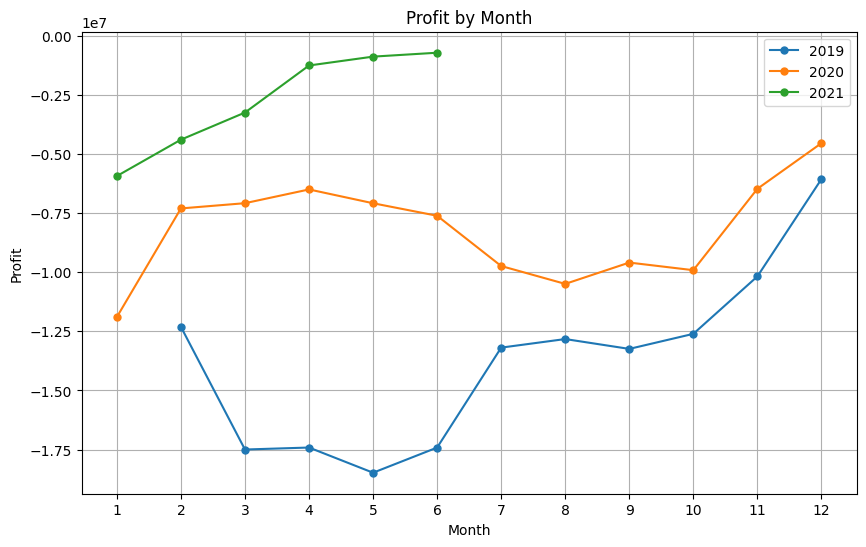

In [71]:
# Examples of plotting from the 'Hurricanes.ipynb' file in Github

# Group merged_df by year
grouped_df = merged_df.groupby('year')

# Set the figure size
plt.figure(figsize=(10,6))

# Loop through each year and plot a separate line
for year, group in grouped_df:plt.plot(group['month'], group['Profit'], label=year, marker='.', markersize=10)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Profit by Month')

# Set the tick marks on X-axis
months = merged_df['month'].unique() # get all the unique months
plt.xticks(months)

# Add a legend
plt.legend()
plt.grid()

# Display the plot
plt.show()